### Note:

This notebook uses the stored rms values inside an HDF5 file and requires that the file exist before-hand. The HDF5 file generation is changing somewhat so this notebook will inevitably be updated to support that. As such, not much work is going into it right now and this may not work.

In [1]:
import numpy as np
import pandas as pd
import h5py

from matplotlib import pyplot as plt
plt.style.use('bmh')

In [2]:
fn = '/var/panoptes/images/fields/PAN006/7bab97/20180214T234338/PAN006_7bab97_20180214T234338.hdf5'

In [3]:
stamps = h5py.File(fn)

In [47]:
stats = list()

for picid in stamps.keys():
    if 'reference' not in stamps[picid]:
        continue

    rms = dict()
    for k, v in stamps[picid]['reference'].attrs.items():
        rms[k] = v
        
    stats.append(rms)
    
stats = pd.DataFrame(stats)

In [48]:
stats.mean()

rms      0.017103
rms_b    0.028467
rms_g    0.019618
rms_r    0.028537
dtype: float64

In [51]:
stats.columns.values

array(['rms', 'rms_b', 'rms_g', 'rms_r'], dtype=object)

Text(0.5,0.98,'RMS Distribution')

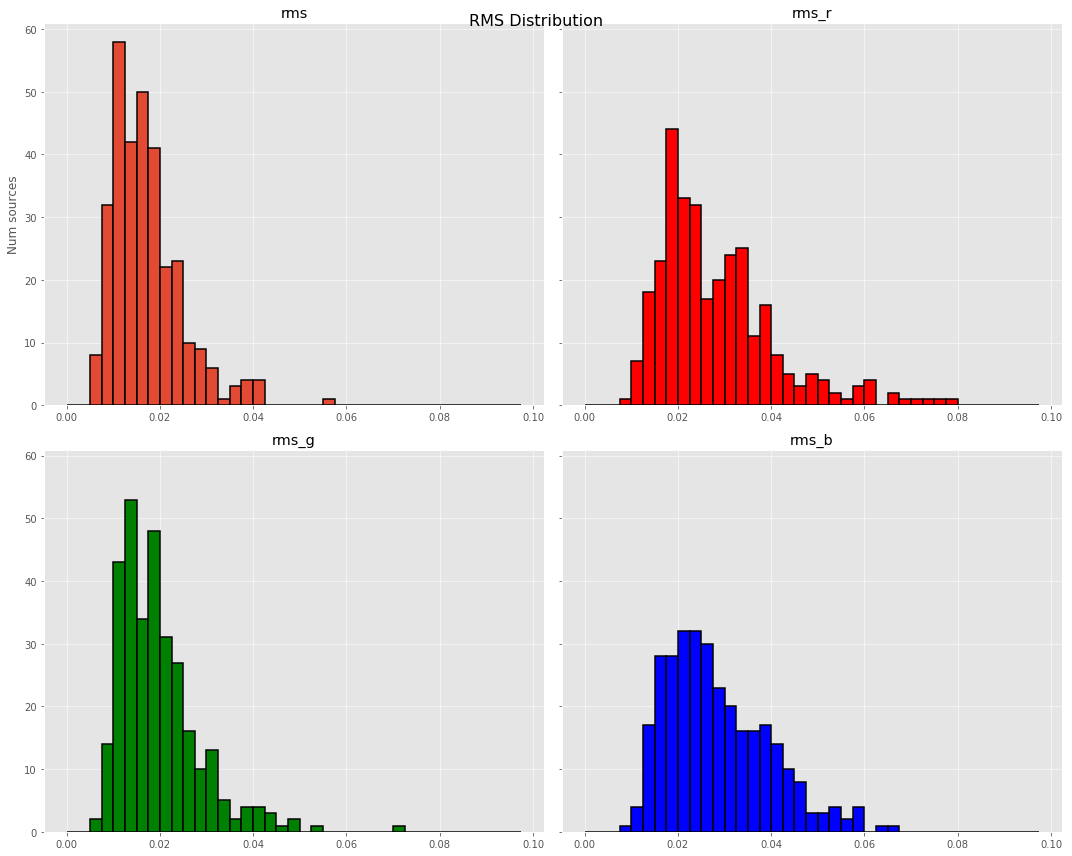

In [85]:
plt.style.use('ggplot')

fig, ax = plt.subplots(2, 2,  sharey=True)
fig.set_size_inches((15, 12))

stats['rms'].hist(bins=np.arange(0, 0.1, 0.0025), edgecolor='k', lw=1.5, ax=ax[0][0])
stats['rms_r'].hist(bins=np.arange(0, 0.1, 0.0025), color='r', edgecolor='k', lw=1.5, ax=ax[0][1])
stats['rms_g'].hist(bins=np.arange(0, 0.1, 0.0025), color='g', edgecolor='k', lw=1.5, ax=ax[1][0])
stats['rms_b'].hist(bins=np.arange(0, 0.1, 0.0025), color='b', edgecolor='k', lw=1.5, ax=ax[1][1])

ax[0][0].set_title('rms')
ax[0][1].set_title('rms_r')
ax[1][0].set_title('rms_g')
ax[1][1].set_title('rms_b')

ax[0][0].set_ylabel('Num sources')

fig.tight_layout()
fig.suptitle('RMS Distribution', fontsize=16)